# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Read your api key environment variable
from newsapi import NewsApiClient
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")
bitcoin_articles



{'status': 'ok',
 'totalResults': 8304,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Richard Lawler',
   'title': 'Kaseya ransomware attackers demand $70 million, claim they infected over a million devices',
   'description': 'Three days after ransomware attackers hijacked a managed services platform, recovery efforts continued. The REvil group is reportedly asking for as much as $70 million in Bitcoin to unlock the more than 1 million devices infected.',
   'url': 'https://www.theverge.com/2021/7/5/22564054/ransomware-revil-kaseya-coop',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/nk-drxT0WYuHTTAQw6MhPgi4LK8=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8792137/acastro_170629_1777_0008_v2.jpg',
   'publishedAt': '2021-07-05T19:45:10Z',
   'content': 'Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers 

In [5]:
# Fetch the Ethereum news articles
ether_articles = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy")
ether_articles

{'status': 'ok',
 'totalResults': 2336,
 'articles': [{'source': {'id': 'mashable', 'name': 'Mashable'},
   'author': 'Joseph Green',
   'title': 'This blockchain development course bundle is on sale for 97% off',
   'description': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\n\nIs everyone you know investing in cryptocurrency? The Cryptocurrency with Ethereum and Solidity Blockchain Dev…',
   'url': 'https://mashable.com/uk/shopping/june-17-cryptocurrency-ethereum-and-solidity-blockchain-developer-bundle/',
   'urlToImage': 'https://mondrian.mashable.com/2021%252F06%252F17%252Fa4%252Fd95c8d39ee014266beea8c6b9d053d19.1c765.jpg%252F1200x630.jpg?signature=13rMcdTv3FsupfDx5m8coAhsN-4=',
   'publishedAt': '2021-06-17T04:05:00Z',
   'content': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
1,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
2,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
3,2021-06-16,"SAN SALVADOR, June 16 (Reuters) - El Salvador ...",0.1280,0.043,0.000,0.957
4,2021-06-23,"LONDON, June 23 (Reuters) - El Salvador is det...",0.2023,0.105,0.057,0.838


In [7]:
# Create the Ethereum sentiment scores DataFrame
ether_sentiments = []

for article in ether_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ether_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ether_df = pd.DataFrame(ether_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ether_df = ether_df[cols]

ether_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-17,TL;DR: The Cryptocurrency with Ethereum and So...,0.0000,0.000,0.000,1.000
1,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
2,2021-06-20,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939
3,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849
4,2021-07-05,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.014235,0.051950,0.044450,0.903550
std,0.367480,0.059386,0.053827,0.075315
min,-0.612400,0.000000,0.000000,0.705000
25%,-0.381800,0.000000,0.000000,0.853000
50%,0.000000,0.021500,0.028500,0.920000
75%,0.202300,0.108750,0.077000,0.955500
max,0.726400,0.164000,0.184000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ether_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.098205,0.051200,0.028000,0.920800
std,0.390533,0.065917,0.036127,0.063043
min,-0.381800,0.000000,0.000000,0.806000
25%,-0.317450,0.000000,0.000000,0.898000
50%,0.000000,0.000000,0.000000,0.923000
75%,0.371375,0.092000,0.069500,0.961000
max,0.771700,0.194000,0.080000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A:Bitcoin has the highest mean positive score with .051950 

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score showing .771700

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score at .194000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')

sw = set(stopwords.words('english'))


# Expand the default stopwords list if necessary
sw_addon = {'the'}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    sw_addon = {'the'}
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)

bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, ha, r..."
1,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, imagesthe, gang, behin..."
2,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
3,2021-06-16,"SAN SALVADOR, June 16 (Reuters) - El Salvador ...",0.1280,0.043,0.000,0.957,"[san, salvador, june, reuters, el, salvador, r..."
4,2021-06-23,"LONDON, June 23 (Reuters) - El Salvador is det...",0.2023,0.105,0.057,0.838,"[london, june, reuters, el, salvador, determin..."


In [14]:
# Create a new tokens column for Ethereum
ether_df['tokens'] = ether_df['text'].apply(tokenizer)

ether_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-17,TL;DR: The Cryptocurrency with Ethereum and So...,0.0000,0.000,0.000,1.000,"[tldr, cryptocurrency, ethereum, solidity, blo..."
1,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
2,2021-06-20,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939,"[wasnt, long, ago, average, person, clue, nft,..."
3,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
4,2021-07-05,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806,"[ether, holder, staked, billion, worth, crypto..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
big_string_1 = bitcoin_df['text'].str.cat()
processed_1 = tokenizer(big_string_1)
bigrams_1 = Counter(ngrams(processed_1, n=2))

In [17]:
# Generate the Ethereum N-grams where N=2
big_string_2 = ether_df['text'].str.cat()
processed_2 = tokenizer(big_string_2)
bigrams_2 = Counter(ngrams(processed_2, n=2))

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
top_10_btc = token_count(bigrams_1, 10)

top_10_btc

[(('reuters', 'bitcoin'), 6),
 (('june', 'reuters'), 5),
 (('reuters', 'el'), 4),
 (('el', 'salvador'), 4),
 (('bitcoin', 'legal'), 4),
 (('legal', 'tender'), 4),
 (('charsby', 'reuters'), 4),
 (('losing', 'previous'), 4),
 (('previous', 'closebitcoin'), 4),
 (('closebitcoin', 'world'), 4)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
top_10_eth = token_count(bigrams_2, 10)

top_10_eth

[(('world', 'biggest'), 6),
 (('reuters', 'bitcoin'), 5),
 (('losing', 'previous'), 5),
 (('previous', 'closebitcoin'), 5),
 (('closebitcoin', 'world'), 5),
 (('biggest', 'bestknown'), 5),
 (('bestknown', 'cryptocurrency'), 5),
 (('cryptocurrency', 'ethereum'), 4),
 (('charsby', 'reuters'), 4),
 (('ethereum', 'network'), 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]




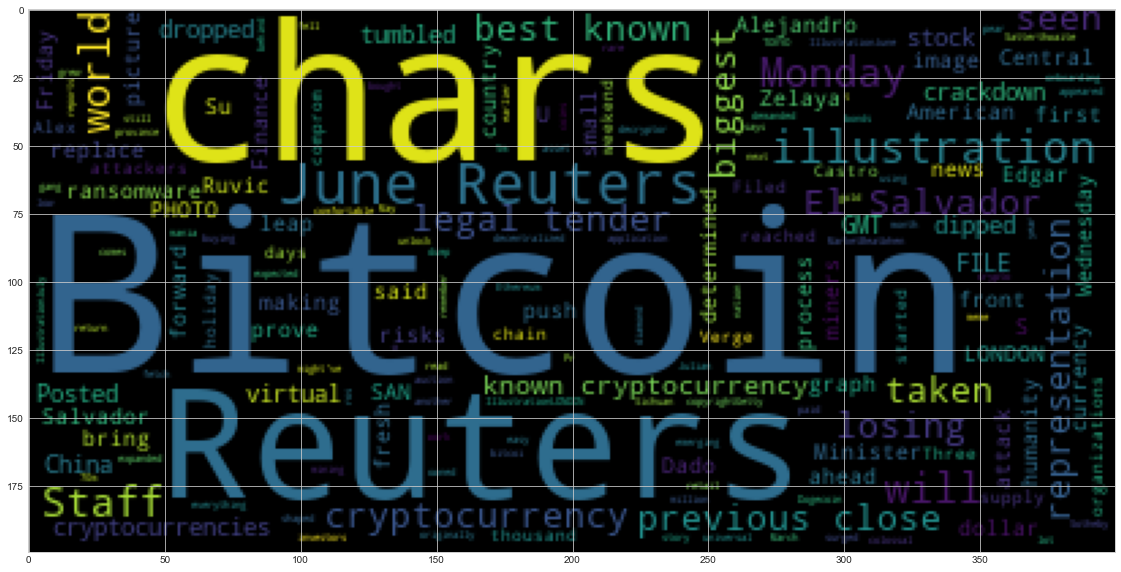

In [22]:
# Generate the Bitcoin word cloud
wc_btc = WordCloud().generate(big_string_1)
plt.imshow(wc_btc)

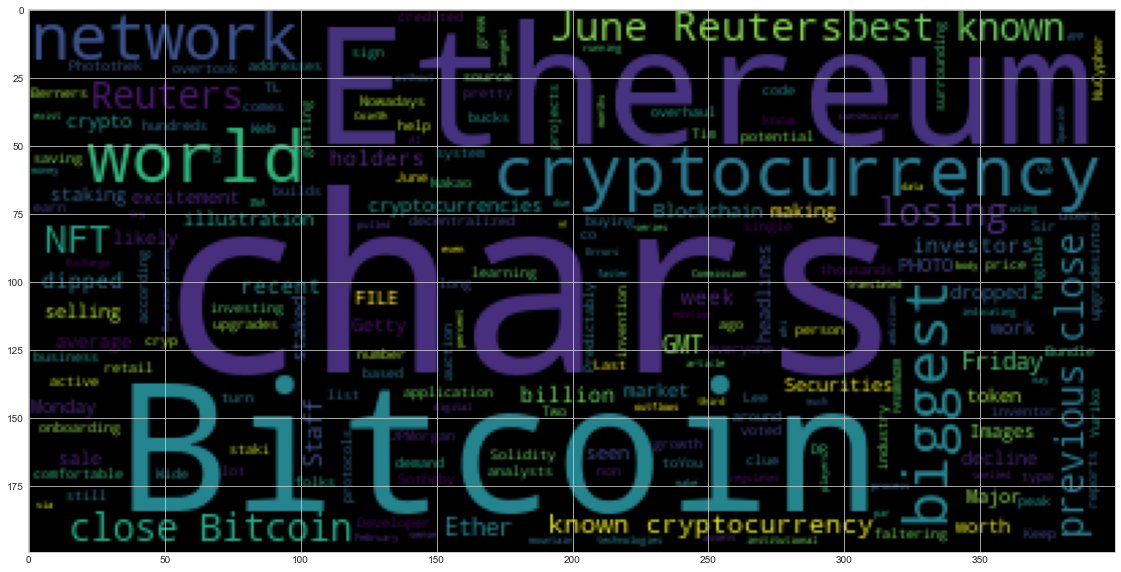

In [23]:
# Generate the Ethereum word cloud
wc_eth = WordCloud().generate(big_string_2)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

print("finished download of package")

finished download of package


In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
bitcoin_text = (big_string_1)

In [ ]:
# Run the NER processor on all of the text
doc_1 = nlp(bitcoin_text)

# Add a title to the document
doc_1.user_data["NER Visualization - Bitcoin"] = "NER Visualization - Bitcoin"

In [ ]:
# Render the visualization
displacy.render(doc_1, style='ent')

In [ ]:
# List all Entities
for ent in doc_1.ents:
    print(ent.text)

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
ethereum_text = (big_string_2)

In [ ]:
# Run the NER processor on all of the text
doc_2 = nlp(ethereum_text)

# Add a title to the document
doc_2.user_data["NER Visualization - Ethereum"] = "NER Visualization - Ethereum"

In [ ]:
# Render the visualization
displacy.render(doc_2, style='ent')

In [ ]:
# List all Entities
for ent in doc_2.ents:
    print(ent.text)

---